In [1]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [4]:
!ls

data  data.yaml  runs  yolo_dataset  yolov8s.pt


In [7]:
import os
import random
import shutil
import glob

# Define the directories
data_dir = '/content/drive/MyDrive/yolov8/yolo_dataset'
train_images_dir = os.path.join(data_dir, 'train', 'images')
train_labels_dir = os.path.join(data_dir, 'train', 'labels')

# Create a new directory for the subset
subset_dir = '/content/drive/MyDrive/yolov8/yolo_dataset_subset'
subset_images_dir = os.path.join(subset_dir, 'train', 'images')
subset_labels_dir = os.path.join(subset_dir, 'train', 'labels')
os.makedirs(subset_images_dir, exist_ok=True)
os.makedirs(subset_labels_dir, exist_ok=True)

# Get a list of all image files
image_files = glob.glob(os.path.join(train_images_dir, '*.jpg'))  # Change the extension if necessary

# Select a random subset of 300 images
subset_image_files = random.sample(image_files, 300)

# Copy the selected images and corresponding labels to the new directory
for image_file in subset_image_files:
    label_file = os.path.join(train_labels_dir, os.path.basename(image_file).replace('.jpg', '.txt'))  # Change the extension if necessary
    shutil.copy(image_file, subset_images_dir)
    shutil.copy(label_file, subset_labels_dir)

print(f"Subset of 300 images created at {subset_dir}")


Subset of 300 images created at /content/drive/MyDrive/yolov8/yolo_dataset_subset


In [10]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolov8/data.yaml epochs=25 imgsz=640 batch=-1 lr0=0.001 plots=True


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/yolov8/data.yaml, epochs=25, patience=50, batch=-1, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [15]:
!yolo task=detect mode=train model=/content/drive/MyDrive/yolov8/runs/detect/train5/weights/best.pt data=/content/drive/MyDrive/yolov8/data.yaml epochs=25 imgsz=640 batch=-1 lr0=0.001 plots=True


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/yolov8/data.yaml, epochs=25, patience=50, batch=-1, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1720704278.f9eea7344cf1.8634.0  train_batch1425.jpg    val_batch1_pred.jpg
F1_curve.png					    train_batch1426.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch1427.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


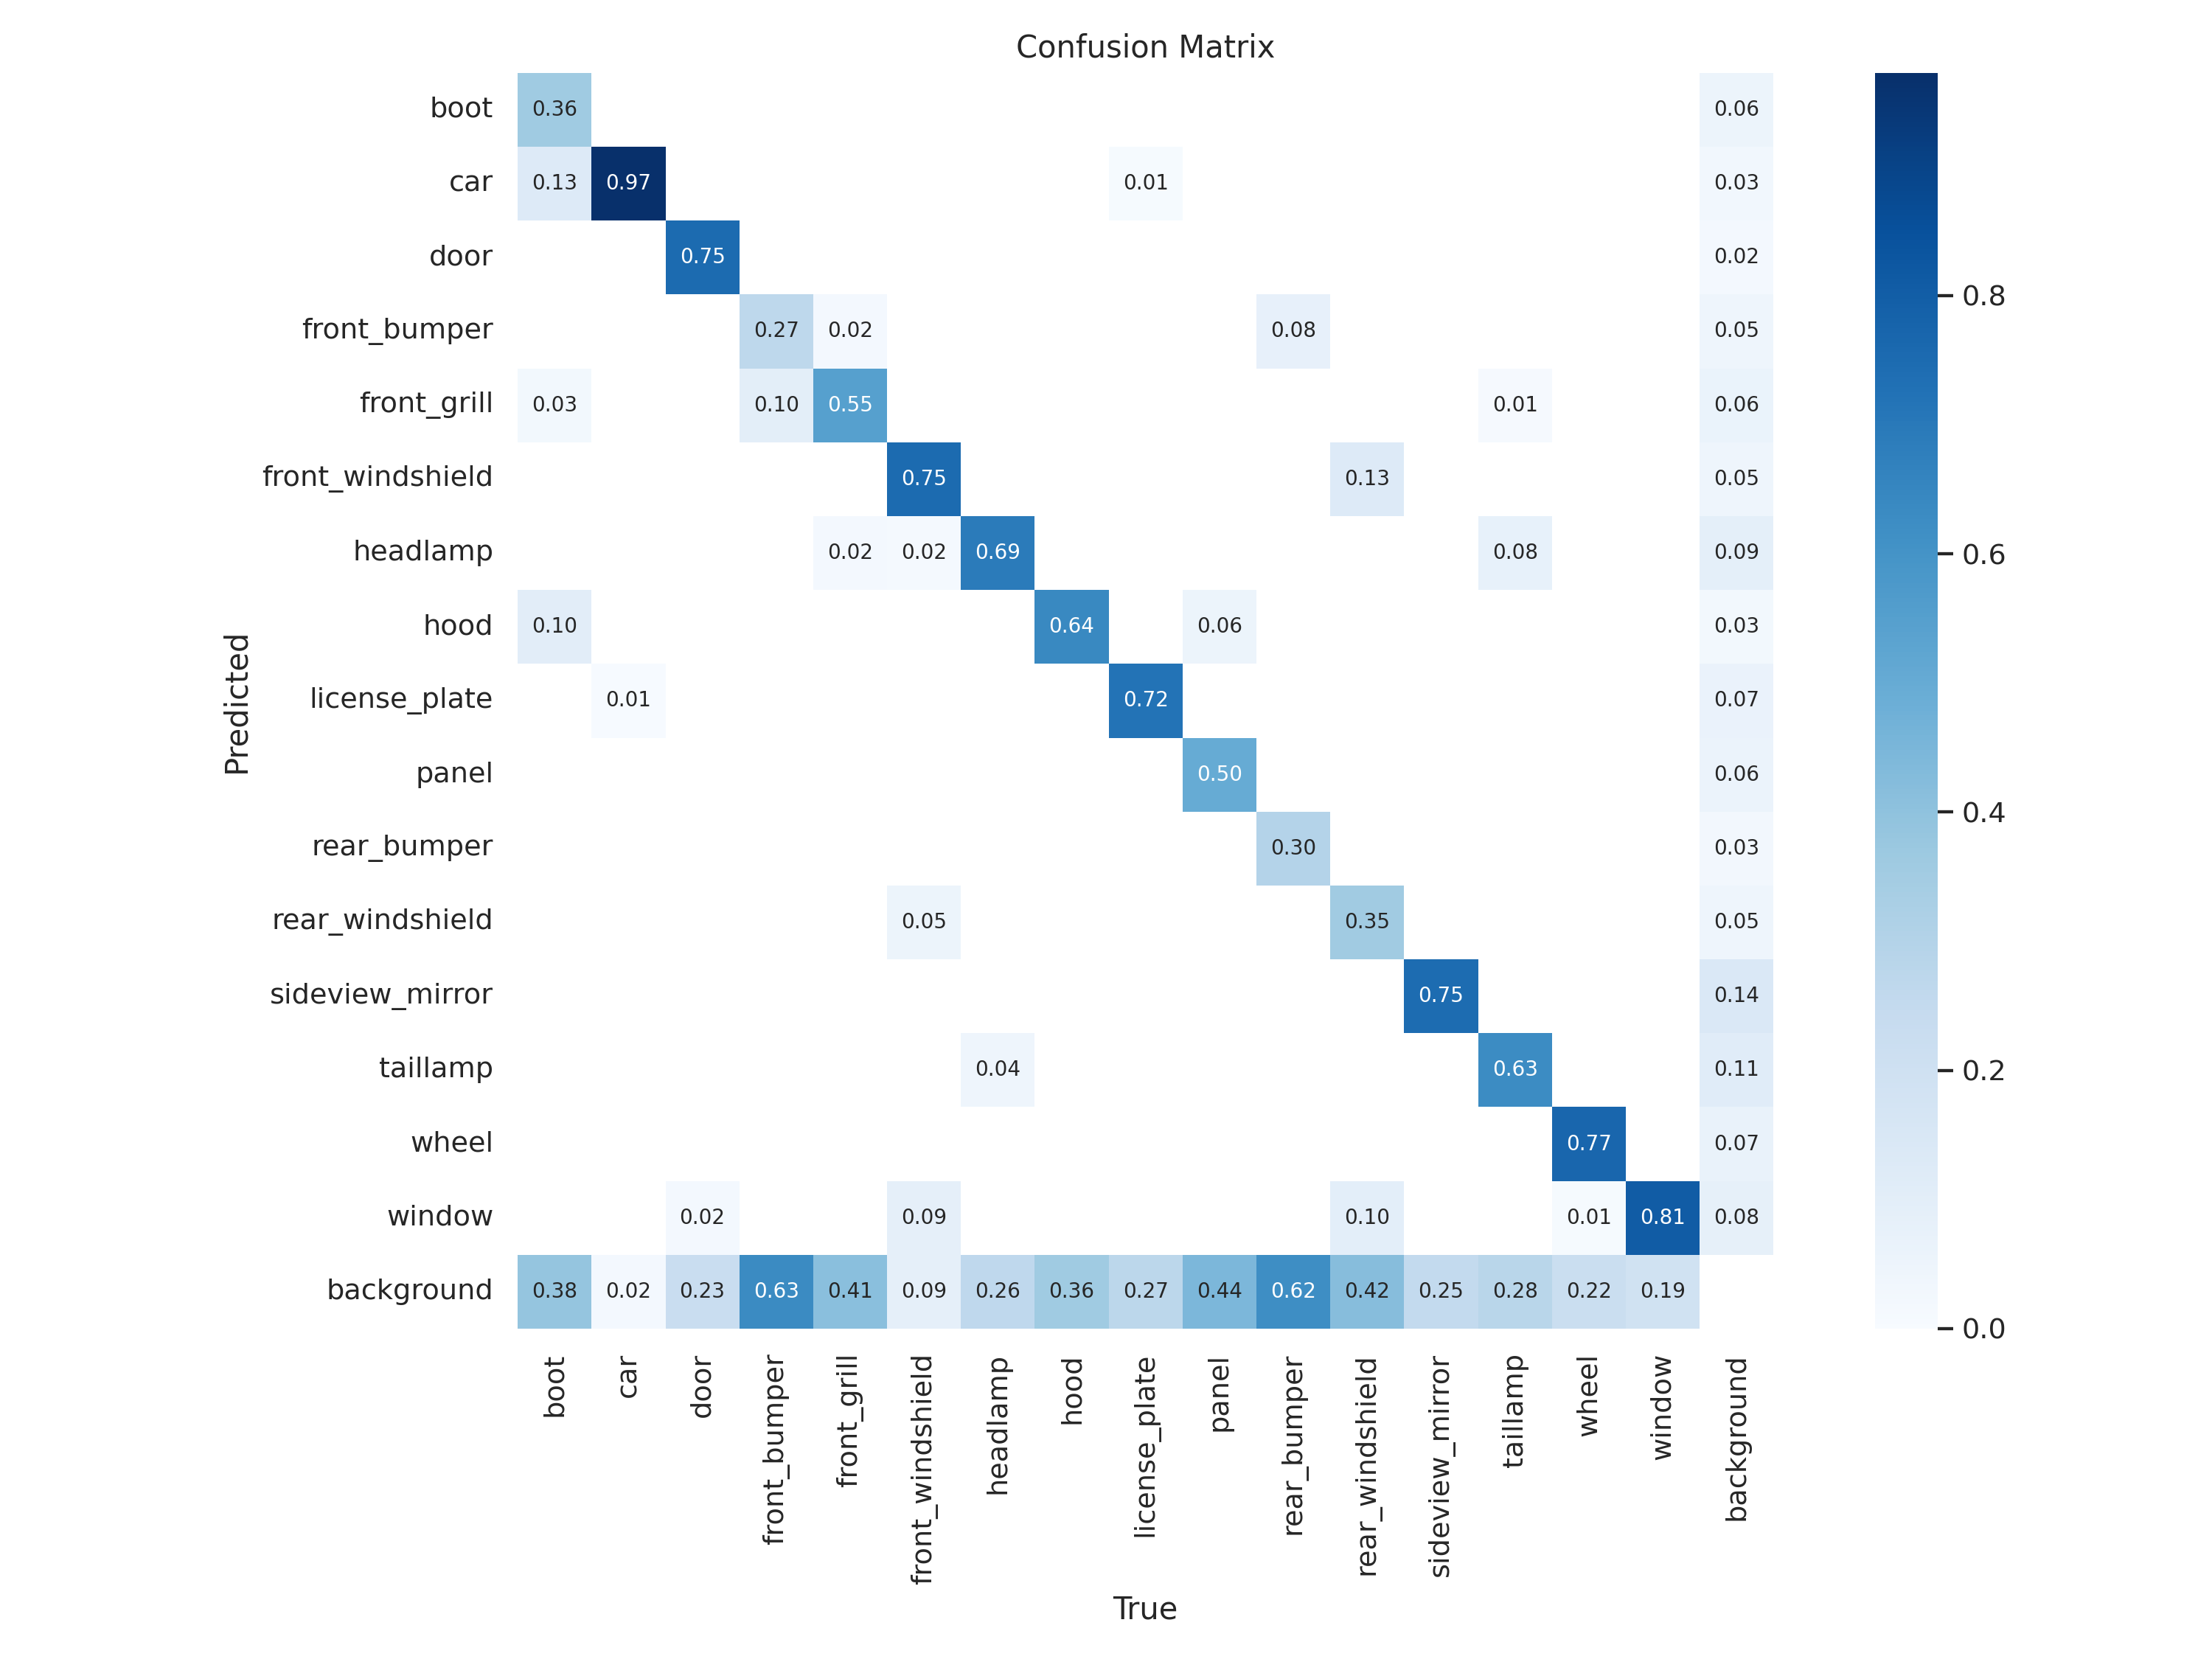

In [16]:
!ls runs/detect/train/
from IPython.display import display, Image

Image(filename='runs/detect/train6/confusion_matrix.png', width=600)

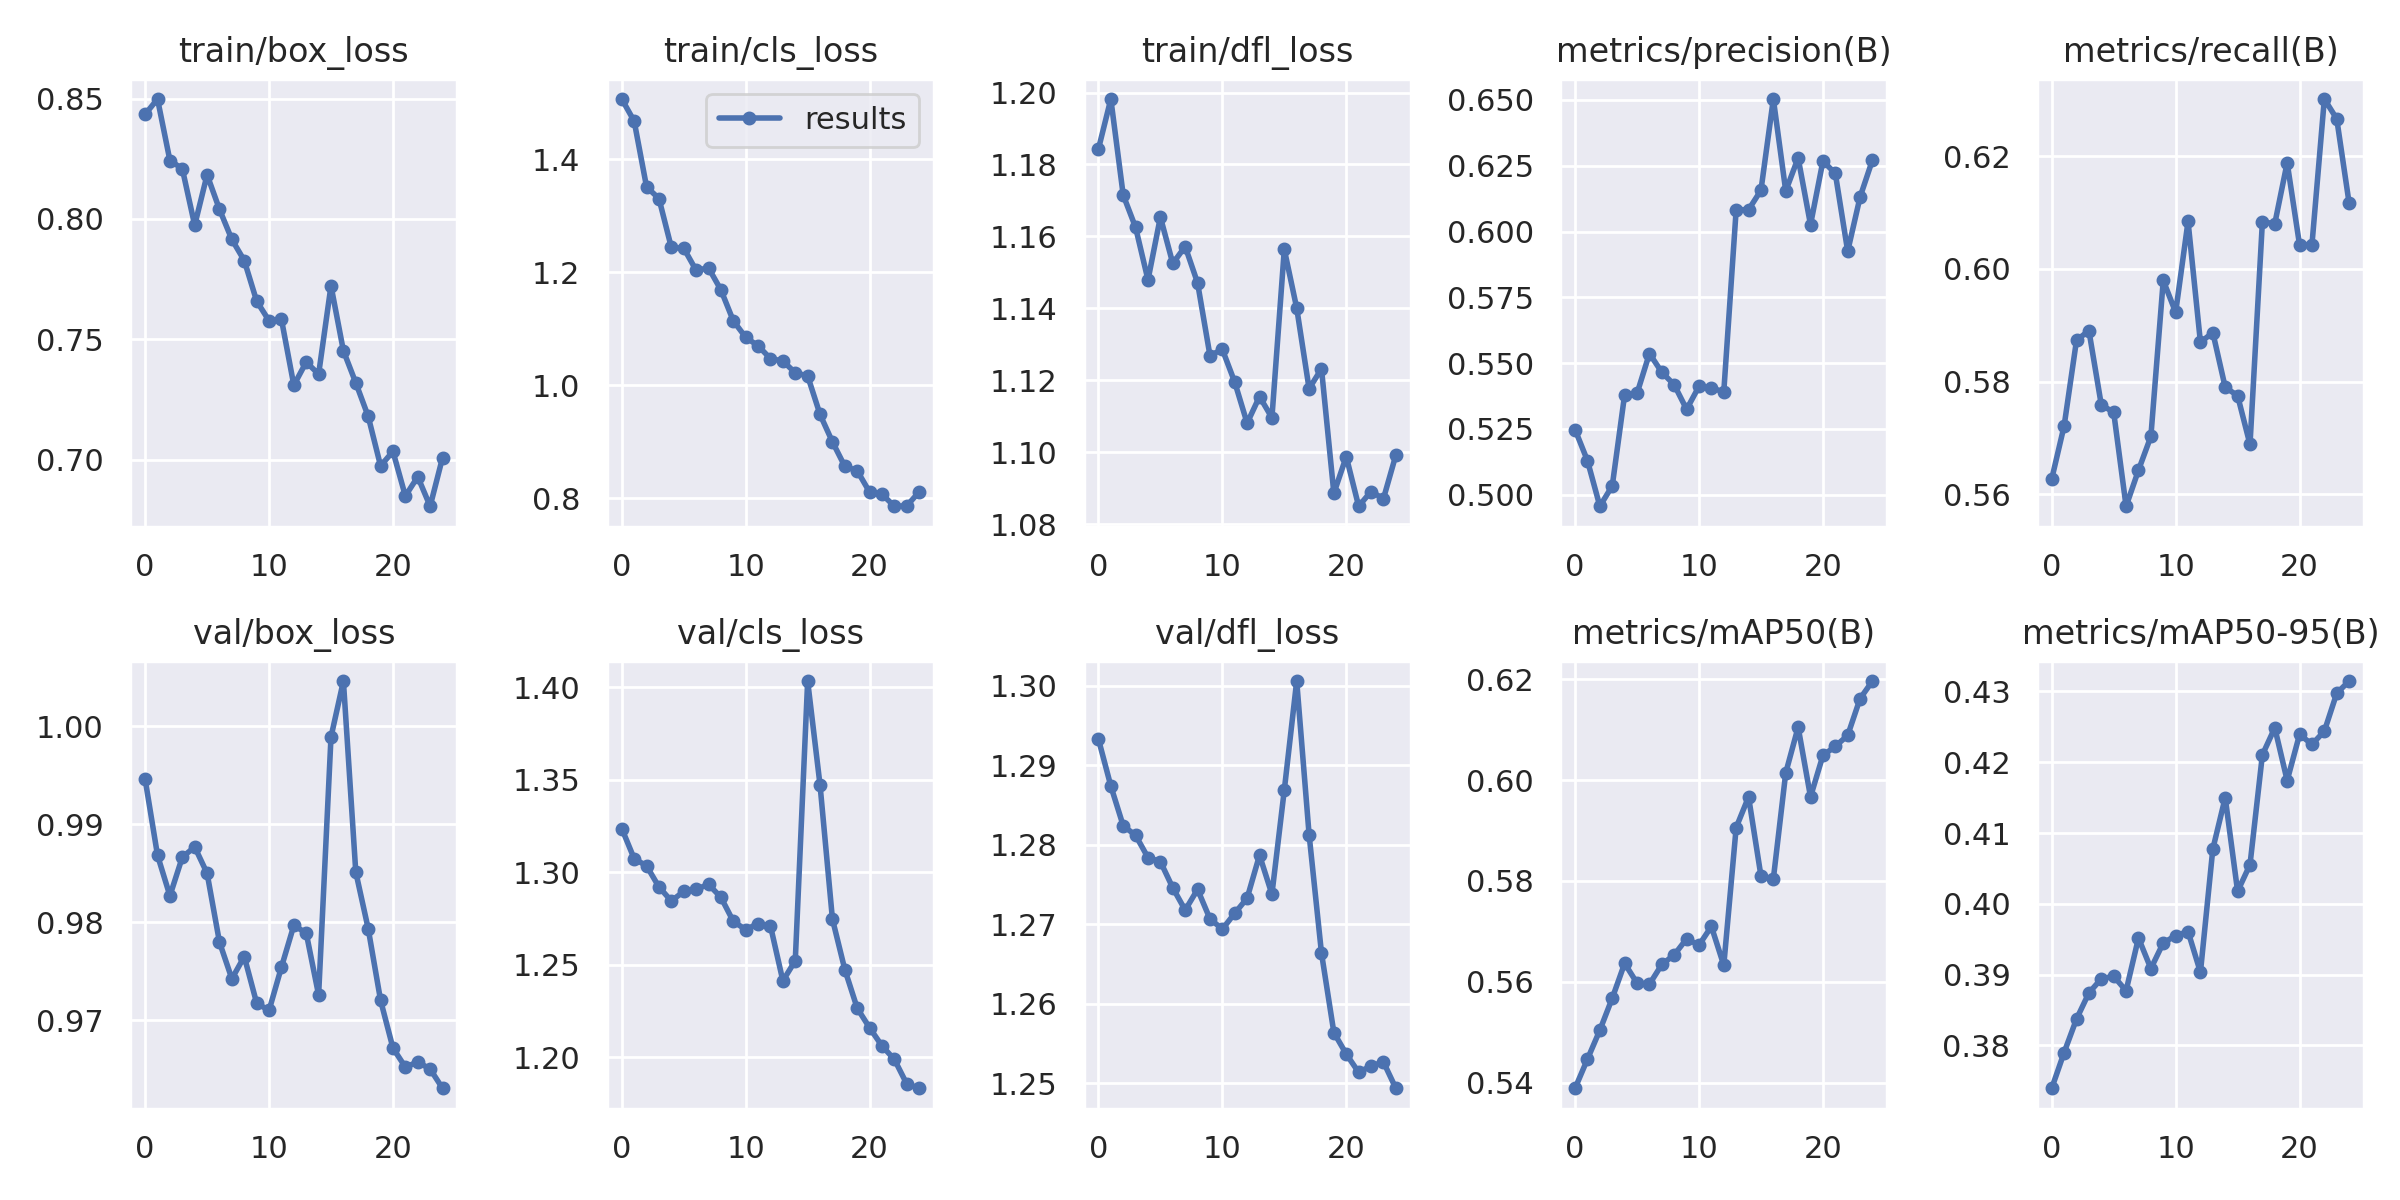

In [26]:
Image(filename='runs/detect/train6/results.png', width=600)

In [24]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=data.yaml

2024-07-12 15:07:53.393476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 15:07:53.393527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 15:07:53.394988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 15:07:53.402526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 15:07:54.599129: W tensorflow/comp

In [27]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source=yolo_dataset/test/images save_txt=True save='/content/drive/MyDrive/yolov8/runs/detect/predictions'

2024-07-12 15:10:11.815195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 15:10:11.815246: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 15:10:11.816671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 15:10:11.824236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 15:10:13.056849: W tensorflow/comp

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Directory where the predicted images with bounding boxes are saved
predictions_images_dir = '/content/drive/MyDrive/yolov8/runs/detect/predict3'  # Update with your actual path

# Function to display images with bounding boxes
def display_predictions(predictions_images_dir):
    # List all the images in the predictions directory
    image_files = [f for f in os.listdir(predictions_images_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Display each image
    for image_file in image_files:
        image_path = os.path.join(predictions_images_dir, image_file)
        image = Image.open(image_path)

        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

# Display the predicted images with bounding boxes
display_predictions(predictions_images_dir)



Output hidden; open in https://colab.research.google.com to view.